<a href="https://colab.research.google.com/github/namwootree/Portfolio/blob/main/Alphaco_(Deep_Learning_Boot_Camp)/Long-Term%20Program/revised_data_visualization_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting

In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155632 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumSquare')

In [2]:
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)

NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
Nanum Brush Script = /usr/share/fonts/truetype/nanum/NanumBrush.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf
NanumGothic Eco = /usr/share/fonts/truetype/nanum/NanumGothicEco.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf
NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareL.ttf
NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicLight.ttf
NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf
NanumGothicCoding = /usr/share/fonts/truetype/nanum/Nanu

In [3]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 12.5 MB/s 
     |████████████████████████████████| 453 kB 67.3 MB/s 


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from konlpy.tag import Okt
import re

from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud
import cv2

# 데이터 불러오기

In [7]:
df = pd.read_csv('/content/drive/MyDrive/알파코/프로젝트/장기 프로젝트/revised_data.csv')
topic_dict = pd.read_csv('/content/drive/MyDrive/알파코/프로젝트/장기 프로젝트/topic_dict.csv')

In [8]:
df.shape

(105399, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105399 entries, 0 to 105398
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  105399 non-null  int64 
 1   title       105399 non-null  object
 2   topic_idx   105399 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ MB


In [10]:
df.head()

,Unnamed: 0,title,topic_idx
0,0,엔리케 메시지는 최고의... 심지어 먹을 때도 남아있다.,5
1,1,공기 보조금 지급... 나머지 예산·인출 반환 하지 않다.,1
2,2,한·일 시민들 日오키나와서 강제동원 희생자 유골과 마주보다,2
3,3,화웨이 AI 탑재 첫 스마트폰 메이트 10…최고 100만원대 출시,0
4,4,1 분기 주택 면허 16만 가구...지난 해보다 37.2% ↑,1


In [11]:
topic_dict

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


# 데이터 전처리

In [12]:
list_idx = list(topic_dict['topic_idx'])
list_topic = list(topic_dict['topic'])

In [13]:
change = {}

for i, t in zip(list_idx, list_topic):
  change[i] = t

change

{0: 'IT과학', 1: '경제', 2: '사회', 3: '생활문화', 4: '세계', 5: '스포츠', 6: '정치'}

In [14]:
new = []

for idx in list(df['topic_idx']):
  new.append(change[idx])

new[:5]

['스포츠', '경제', '사회', 'IT과학', '경제']

In [15]:
df['topic_idx'] = new

In [16]:
df.tail()

,Unnamed: 0,title,topic_idx
105394,105394,넥센 선택 조정 승수 실패...브리검 4인닝 5점 강판,스포츠
105395,105395,오스트리아에서 플레이한 김재우 센터,스포츠
105396,105396,졸업 가운·학사모에 마스크...코로나19가 바꾸어 졸업 사진 풍경,사회
105397,105397,정치적 격렬함을 촉진하는 문학이 필요하다.,생활문화
105398,105398,특검 삼성 합병 외압의혹 문형표·김진수 자택 압수수색,사회


# 데이터 시각화

### Topic 분포

In [17]:
df['topic_idx'].value_counts()

스포츠     15057
경제      15057
사회      15057
IT과학    15057
정치      15057
생활문화    15057
세계      15057
Name: topic_idx, dtype: int64

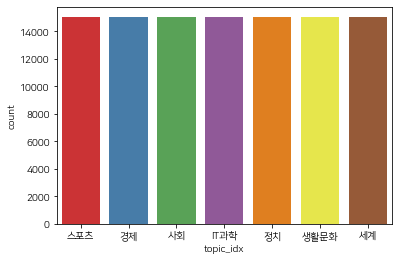

In [18]:
sns.countplot(data=df, x='topic_idx',
              order=df['topic_idx'].value_counts().index,
              palette='Set1')

### 문장 길이 분포

In [19]:
topic = list(df['title'])

length_title = []
list_topic = list(df['topic_idx'])


for t in topic:
  length_title.append(len(t))

dict_lenght = {'title_length':length_title,
               'topic':list_topic}

df_length = pd.DataFrame(dict_lenght)

df_length.head()

,title_length,topic
0,31,스포츠
1,32,경제
2,32,사회
3,36,IT과학
4,34,경제


In [20]:
min_length = df_length['title_length'].min()
max_length = df_length['title_length'].max()

print(f'가장 짧은 문장 길이 : {min_length}')
print(f'가장 긴 문장 길이 : {max_length}')

가장 짧은 문장 길이 : 4
가장 긴 문장 길이 : 388


In [21]:
top_10_many_length = list(df_length['title_length'].value_counts())[:10]
top_10_many_length

[8201, 8037, 7896, 7713, 7692, 6848, 6689, 5718, 5032, 4824]

In [22]:
little_length = list(df_length['title_length'].value_counts())[-1]
many_length = list(df_length['title_length'].value_counts())[0]

print(f'가장 적은 문장 길이 개수 : {little_length}')
print(f'가장 많은 문장 길이 개수 : {many_length}')

가장 적은 문장 길이 개수 : 1
가장 많은 문장 길이 개수 : 8201


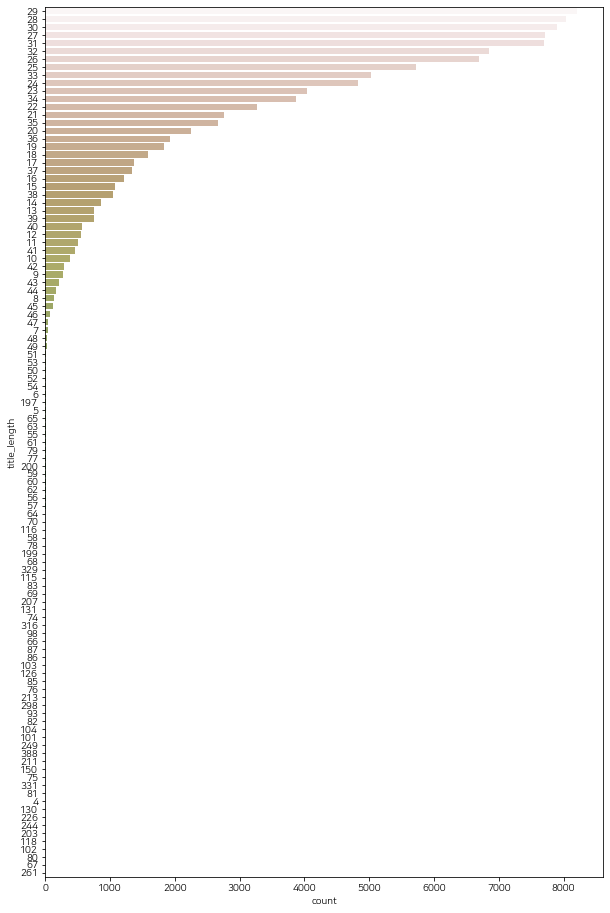

In [25]:
plt.figure(figsize=(10,16))
sns.countplot(data=df_length, y='title_length',
              order=df_length['title_length'].value_counts().index,palette='gist_earth_r')

In [ ]:
sns.boxplot(data=df,)

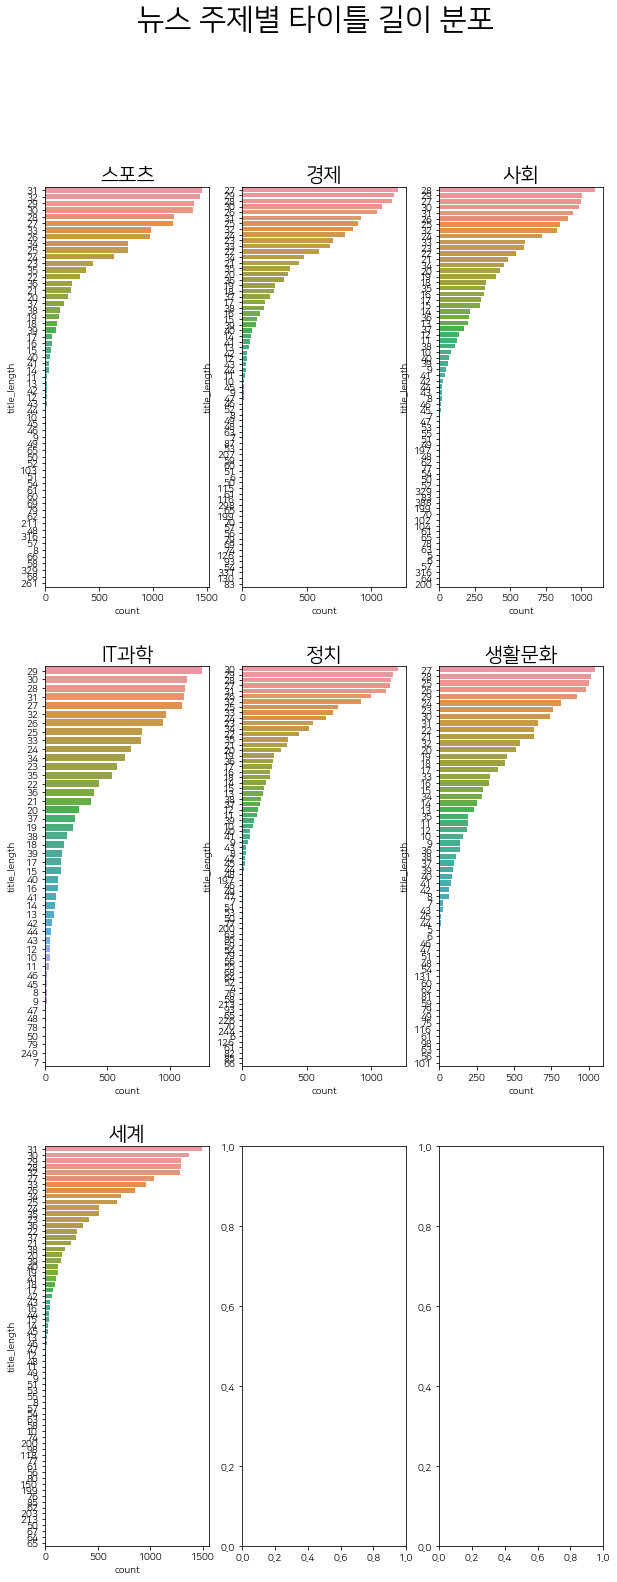

In [26]:
col_n = 3
row_n = 3

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(10,25))

fig.suptitle('뉴스 주제별 타이틀 길이 분포', fontsize=30)

for i, topic in enumerate(list(df_length['topic'].unique())):
  cond = (df_length['topic']==topic)
  plot_df = df_length.loc[cond]
  ax[int(i/col_n),int(i%col_n)].set_title(topic, fontsize = 20)
  sns.countplot(data=plot_df,
              y='title_length',
              order=plot_df['title_length'].value_counts().index,
              ax=ax[int(i/col_n),int(i%col_n)])

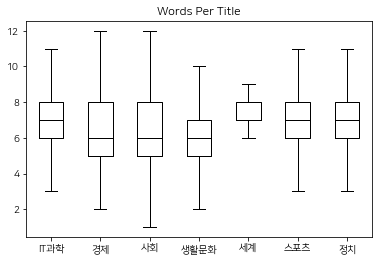

In [33]:
df["Words Per Title"] = df["title"].str.split().apply(len)
df.boxplot("Words Per Title", by="topic_idx", grid=False,
 showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

### 워드 클라우드

In [30]:
f = open("/content/drive/MyDrive/알파코/프로젝트/장기 프로젝트/불용어.txt", 'r')
lines = f.readlines()
stopwords = ['하다'] 
for line in lines:
    line = line.replace('\n', '')
    stopwords.append(line)
f.close()

In [31]:
tokenizer = Okt()

def preprocessing(title, tokenizer, stop_words = stopwords):  
   
    title_text = re.sub('[^ㄱ-ㅎ가-힣ㅏ-ㅣ\\s]', '', title)
    
    word_title = tokenizer.morphs(title_text, stem=True)

    clean_title = [token for token in word_title if not token in stop_words]

    return clean_title

스포츠:   0%|          | 0/15057 [00:00<?, ?it/s]

경제:   0%|          | 0/15057 [00:00<?, ?it/s]

사회:   0%|          | 0/15057 [00:00<?, ?it/s]

IT과학:   0%|          | 0/15057 [00:00<?, ?it/s]

정치:   0%|          | 0/15057 [00:00<?, ?it/s]

생활문화:   0%|          | 0/15057 [00:00<?, ?it/s]

세계:   0%|          | 0/15057 [00:00<?, ?it/s]

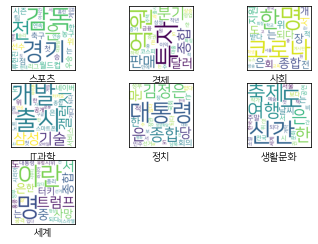

In [32]:
i = 1
fig = plt.figure()

for j, t in enumerate(list(df['topic_idx'].unique())):

  cond = (df['topic_idx']==t)
  plot_df = df.loc[cond]

  clean_title = []

  for title in tqdm(plot_df['title'], desc=t):
    clean = preprocessing(title, tokenizer, stop_words = stopwords)
    clean_title.extend(clean)

  count_word = Counter(clean_title)

  wc=WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
               background_color='white',
               width=500, height=500, max_words=30, max_font_size=200)
  
  wc.generate_from_frequencies(dict(count_word))
  wc.to_file("{}_word.png".format(t))

  img = cv2.imread('{}_word.png'.format(t),
                 cv2.IMREAD_UNCHANGED)

  ax = fig.add_subplot(row_n, col_n, i)
  ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  ax.set_xlabel(t)
  ax.set_xticks([]), ax.set_yticks([])
  i += 1

plt.show()